Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import re
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

Reading the dataset and preprocessing

In [37]:
data=pd.read_csv("customer_support_tickets.csv")
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

Fixing the format

In [39]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], format = '%Y-%m-%d') # fixing the date formats
data['First Response Time'] = pd.to_datetime(data['First Response Time'], format = '%Y-%m-%d %H:%M:%S')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], format = '%Y-%m-%d %H:%M:%S')

In [40]:
data.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

Filling the null values with NAN

In [41]:
def fill_nulls_with_NAN(dataset):
    """
    Fill null values in all columns of the dataset with "NAN".
    
    Parameters:
        dataset (pd.DataFrame): Input DataFrame.
        
    Returns:
        pd.DataFrame: DataFrame with null values filled with "NAN".
    """

    dataset_filled = dataset.apply(lambda col: col.fillna("NAN"))

    return dataset_filled

data = fill_nulls_with_NAN(data)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    

In [43]:
data.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                         0
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating       0
dtype: int64

Drop the unnecessary features

In [44]:
data.drop(['Ticket ID','Customer Name', 'Customer Email'], axis = 1, inplace = True)

Age classification

In [45]:
age = []
for i in data['Customer Age']:
    if i<=30:
        age.append('Young')
    elif 30<i<55:
        age.append('Middle Aged')
    else:
        age.append('Senior')
data['Age Classification'] = age

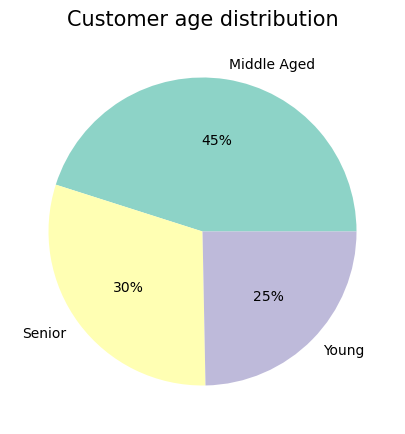

In [46]:
age_chart = data['Age Classification'].value_counts()
gen_chart = data['Customer Gender'].value_counts()
plt.figure(figsize = (10,5))
plt.pie(age_chart, labels = age_chart.index, autopct='%.0f%%', colors = sns.color_palette('Set3'))
plt.title('Customer age distribution', loc = 'center', pad = 10, size = 15)
plt.show()

In [47]:
ticket_data = data[['Ticket Subject', 'Ticket Description', 'Ticket Type']]

Text(0.5, 1.0, 'Distribution of Ticket data')

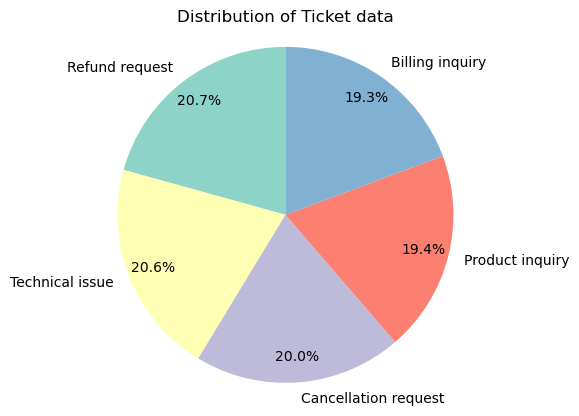

In [48]:
ticket_types = ticket_data['Ticket Type'].value_counts()

categories = ticket_types.index
counts = ticket_types.values


plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=sns.color_palette('Set3'))
fig = plt.gcf()

plt.axis('equal')
plt.title('Distribution of Ticket data')

Feature Engineering

Enhancing the text presentation by cleaning it

In [49]:
ticket_data = data[['Ticket Subject', 'Ticket Description', 'Ticket Type']]
def clean_text(text):
    """
    Clean and preprocess a single text string.
    
    Parameters:
        text (str): Input text to clean.
        
    Returns:
        str: Cleaned text.
    """
    text = str(text).lower()
    text = re.sub(r'\n', ' ', text)  # Remove newline characters
    text = re.sub(r'\t', ' ', text)  # Remove tab characters
    text = re.sub(r'{.*?}', '', text)  # Remove between {}
    text = re.sub(r'\([^)]*\)', '', text)  # Remove between ()
    text = re.sub(r' +', ' ', text)  # Remove multiple space with single

    return text

In [50]:
ticket_data['Ticket Description'] = data_ticket['Ticket Description'].apply(lambda x:clean_text(x))

In [51]:
ticket_data['Ticket Description']

0       i'm having an issue with the . please assist. ...
1       i'm having an issue with the . please assist. ...
2       i'm facing a problem with my . the is not turn...
3       i'm having an issue with the . please assist. ...
4       i'm having an issue with the . please assist. ...
                              ...                        
8464    my is making strange noises and not functionin...
8465    i'm having an issue with the . please assist. ...
8466    i'm having an issue with the . please assist. ...
8467    i'm having an issue with the . please assist. ...
8468    there seems to be a hardware problem with my ....
Name: Ticket Description, Length: 8469, dtype: object

In [58]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem import *

[nltk_data] Downloading package stopwords to C:\Users\Akrati
[nltk_data]     Nigam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Akrati
[nltk_data]     Nigam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Akrati
[nltk_data]     Nigam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [ ]:
def remove_stopwords(text):
    """
    Tokenize a single text string into words.
    
    Parameters:
        text (str): Input text to tokenize.
        
    Returns:
        list: List of tokens (words).
    """
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))
    return text

ticket_data['Ticket Description'] = ticket_data['Ticket Description'].apply(lambda x:remove_stopwords(x))

In [ ]:
flattened_tokens = [token for sequence in ticket_data['Ticket Description'] for token in sequence]
vocab_size = len(set(flattened_tokens))
print("Vocabulary Size:", vocab_size)

In [ ]:
sequence_lengths = [len(sequence) for sequence in ticket_data['Ticket Description']]

# Find the maximum length of input sequences
max_length_of_input = max(sequence_lengths)

print("Maximum Length of Input:", max_length_of_input)

In [ ]:
def tokenize_column(data, column_name):
    """
    Tokenize the values in a specified column of the DataFrame.
    
    Parameters:
        data (pd.DataFrame): Input DataFrame.
        column_name (str): Name of the column to tokenize.
        
    Returns:
        pd.Series: Series containing tokenized values.
    """
    data['Tokenized words'] = data[column_name].apply(nltk.word_tokenize)
    
    return data
ticket_data = tokenize_column(ticket_data, 'Ticket Description')

In [73]:
data_ticket['Ticket Description']

0       i'm having an issue with the . please assist. ...
1       i'm having an issue with the . please assist. ...
2       i'm facing a problem with my . the is not turn...
3       i'm having an issue with the . please assist. ...
4       i'm having an issue with the . please assist. ...
                              ...                        
8464    my is making strange noises and not functionin...
8465    i'm having an issue with the . please assist. ...
8466    i'm having an issue with the . please assist. ...
8467    i'm having an issue with the . please assist. ...
8468    there seems to be a hardware problem with my ....
Name: Ticket Description, Length: 8469, dtype: object

Stemming words

In [83]:
def stem_words(dataset, column):
    stemmer = PorterStemmer()
    dataset['Stemmed Token'] = dataset[column].apply(lambda words : [stemmer.stem(word) for word in words])
    dataset['Stemmed Token'] = dataset['Stemmed Token'].apply(lambda x : ' '.join(x))
    return dataset

ticket_data = stem_words(ticket_data, 'Tokenized words')

In [84]:
data_ticket

,Ticket Subject,Ticket Description,Ticket Type
0,Product setup,i'm having an issue with the . please assist. ...,Technical issue
1,Peripheral compatibility,i'm having an issue with the . please assist. ...,Technical issue
2,Network problem,i'm facing a problem with my . the is not turn...,Technical issue
3,Account access,i'm having an issue with the . please assist. ...,Billing inquiry
4,Data loss,i'm having an issue with the . please assist. ...,Billing inquiry
...,...,...,...
8464,Installation support,my is making strange noises and not functionin...,Product inquiry
8465,Refund request,i'm having an issue with the . please assist. ...,Technical issue
8466,Account access,i'm having an issue with the . please assist. ...,Technical issue
8467,Payment issue,i'm having an issue with the . please assist. ...,Product inquiry


Model Building and Training

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Embedding, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV

Vectorizing

In [88]:
vectorizer = TfidfVectorizer(max_features = 25000)

In [89]:
label_encoder = LabelEncoder()
ticket_data['Encoded Ticket type'] = label_encoder.fit_transform(ticket_data['Ticket Type'])
ticket_data['Encoded Ticket Subject'] = label_encoder.fit_transform(ticket_data['Ticket Subject'])

In [90]:
x = ticket_data[['Stemmed Token', 'Encoded Ticket Subject']]
y = ticket_data[['Encoded Ticket type']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

# fit the TfidfVectorizer on the training data
vectorizer.fit(x_train['Stemmed Token'])

# transform both training and testing data with the same vectorizer
x_train_transformed = vectorizer.transform(x_train['Stemmed Token'])
x_test_transformed = vectorizer.transform(x_test['Stemmed Token'])

Logistic Regression

In [91]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(x_train_transformed, y_train)

y_pred = model.predict(x_test_transformed)

# evaluate the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {acc}")

Accuracy of Logistic Regression Model: 0.18772136953955135


In [96]:
X_train_subjects, X_test_subjects, y_train, y_test = train_test_split(
    ticket_data['Encoded Ticket Subject'].values.reshape(-1, 1), ticket_data['Encoded Ticket type'], test_size=0.3, random_state=42)
X_train_tfidf = vectorizer.transform(x_train['Stemmed Token'])
X_test_tfidf = vectorizer.transform(x_test['Stemmed Token'])

#Concatenate the encoded subject features and TF-IDF vectorized descriptions
X_train_combined = hstack([X_train_subjects, X_train_tfidf])
X_test_combined = hstack([X_test_subjects, X_test_tfidf])

Random Forest Classifier

In [97]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_combined, y_train)

rf_predictions = rfc.predict(X_test_combined)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Classification Report:")
print(rf_report)

Random Forest Classifier:
Accuracy: 0.2066115702479339
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.18      0.20       528
           1       0.19      0.22      0.21       488
           2       0.17      0.16      0.16       481
           3       0.23      0.28      0.25       520
           4       0.20      0.20      0.20       524

    accuracy                           0.21      2541
   macro avg       0.21      0.21      0.20      2541
weighted avg       0.21      0.21      0.21      2541



SVM Classifier

In [ ]:
svmc = SVC(kernel='linear', random_state=42)
svmc.fit(X_train_combined, y_train)

svm_predictions = svmc.predict(X_test_combined)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

print("\nSupport Vector Machine Classifier:")
print("Accuracy:", svm_accuracy)
print("Classification Report:")
print(svm_report)

Deep learning model

In [99]:
model = Sequential()
model.add(Embedding(input_dim=200, output_dim=50, input_length=307))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_combined, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_combined, y_test)
print('Test Accuracy:', accuracy)

Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.2009 - loss: 1.6196 - val_accuracy: 0.2083 - val_loss: 1.6086
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.2099 - loss: 1.6091 - val_accuracy: 0.2083 - val_loss: 1.6083
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.2113 - loss: 1.6089 - val_accuracy: 0.2083 - val_loss: 1.6082
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.2161 - loss: 1.6093 - val_accuracy: 0.2083 - val_loss: 1.6080
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.2153 - loss: 1.6089 - val_accuracy: 0.2083 - val_loss: 1.6080
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.2067 - loss: 1.6094 - val_accuracy: 0.2083 - val_loss: 1.6080
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.2037 - loss: 1.6090 - val_accuracy: 0.2083 - val_loss: 1.6079
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.1932 - loss: 1.6100 - val_accu